In [1]:
import tensorflow as tf
import numpy as np
import os
import random
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', size=16) 
from sklearn.preprocessing import MinMaxScaler
import warnings
import logging
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import regularizers
tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)
import math
seed=42
import tensorflow as tf

!pip install pyDOE

2023-09-13 16:10:45.505556: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-13 16:10:45.532313: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 16:10:45.728738: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-13 16:10:45.729635: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-13 16:10:46.750036: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

2.13.0


In [2]:
#you need to add a dataset with GaussJacobiQuadRule_V3 on the right 
import sys
# sys.path.insert(1, '/kaggle/input/quadrule')
from GaussJacobiQuadRule_V3 import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights

import pyDOE

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pyDOE import lhs
#from GaussJacobiQuadRule_V3.py import Jacobi, DJacobi, GaussLobattoJacobiWeights, GaussJacobiWeights
import time

tf.Tensor(
[[-2.  ]
 [-1.98]
 [-1.96]
 [-1.94]
 [-1.92]
 [-1.9 ]
 [-1.88]
 [-1.86]
 [-1.84]
 [-1.82]
 [-1.8 ]
 [-1.78]
 [-1.76]
 [-1.74]
 [-1.72]
 [-1.7 ]
 [-1.68]
 [-1.66]
 [-1.64]
 [-1.62]
 [-1.6 ]
 [-1.58]
 [-1.56]
 [-1.54]
 [-1.52]
 [-1.5 ]
 [-1.48]
 [-1.46]
 [-1.44]
 [-1.42]
 [-1.4 ]
 [-1.38]
 [-1.36]
 [-1.34]
 [-1.32]
 [-1.3 ]
 [-1.28]
 [-1.26]
 [-1.24]
 [-1.22]
 [-1.2 ]
 [-1.18]
 [-1.16]
 [-1.14]
 [-1.12]
 [-1.1 ]
 [-1.08]
 [-1.06]
 [-1.04]
 [-1.02]
 [-1.  ]
 [-0.98]
 [-0.96]
 [-0.94]
 [-0.92]
 [-0.9 ]
 [-0.88]
 [-0.86]
 [-0.84]
 [-0.82]
 [-0.8 ]
 [-0.78]
 [-0.76]
 [-0.74]
 [-0.72]
 [-0.7 ]
 [-0.68]
 [-0.66]
 [-0.64]
 [-0.62]
 [-0.6 ]
 [-0.58]
 [-0.56]
 [-0.54]
 [-0.52]
 [-0.5 ]
 [-0.48]
 [-0.46]
 [-0.44]
 [-0.42]
 [-0.4 ]
 [-0.38]
 [-0.36]
 [-0.34]
 [-0.32]
 [-0.3 ]
 [-0.28]
 [-0.26]
 [-0.24]
 [-0.22]
 [-0.2 ]
 [-0.18]
 [-0.16]
 [-0.14]
 [-0.12]
 [-0.1 ]
 [-0.08]
 [-0.06]
 [-0.04]
 [-0.02]
 [ 0.  ]
 [ 0.02]
 [ 0.04]
 [ 0.06]
 [ 0.08]
 [ 0.1 ]
 [ 0.12]
 [ 0.14]
 [ 0.16]
 [ 0.18]

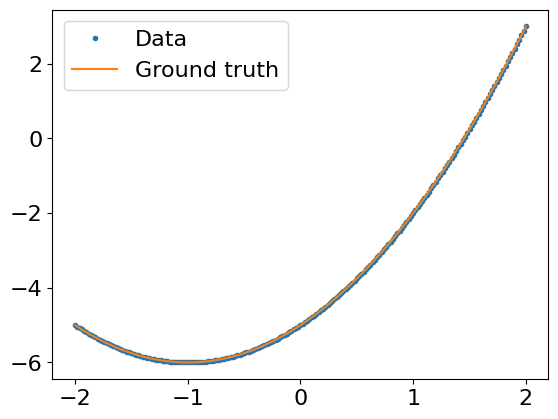

In [4]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + 0*tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend();
x_=tf. expand_dims(x,-1)
y_=tf. expand_dims(y,-1)
print(x_)

In [15]:

class Model(tf.keras.Model):
  def __init__(self,*kwargs):
    super().__init__()
    #structure of the nework maybe implment a general way
    self.dense1 = tf.keras.layers.Dense(units=16,
                                        activation='gelu',
                                        kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal)
    self.dense2 = tf.keras.layers.Dense(units=16,
                                    activation='gelu',
                                    kernel_initializer=tf.random.normal,
                                    bias_initializer=tf.random.normal)
    self.y = tf.keras.layers.Dense(1,kernel_initializer=tf.random.normal,)
    self.history=[]
    
  def call(self, inputs):
    # x = x[:, tf.newaxis]
    x = self.dense1(inputs)
    x = self.dense2(x)
    return self.y(x)

  def net_du(self, x):
    t = tf.Variable(x)
    with tf.GradientTape() as g:
      g.watch(t)
      with tf.GradientTape() as gg:
        gg.watch(t)
        y = model(t)
      dy_dx = gg.gradient(y, t)  # dy_dx = 2 * x
    d2y_dx2 = g.gradient(dy_dx, t)  # d2y_dx2 = 2
    return dy_dx,d2y_dx2

  def train(self,x,y):
    variables = self.variables
    optimizer = tf.optimizers.Adam(learning_rate=0.001)
    print('-->training_starting')
    for step in range(2000):
      with tf.GradientTape() as tape:
        prediction = model(x)
        error = (y-prediction)**2
        error_der=(self.net_du(x)-2*x)**2
        mean_error = tf.reduce_mean(error)
        mean_error_der=tf.reduce_mean(error_der)
        
      gradient = tape.gradient(mean_error+mean_error_der, variables)
      optimizer.apply_gradients(zip(gradient, variables))

      if step % 100 == 0:
        print(f'Iter: {step}',f'Mean squared error: {mean_error.numpy():0.6f}')
        self.history.append(mean_error)

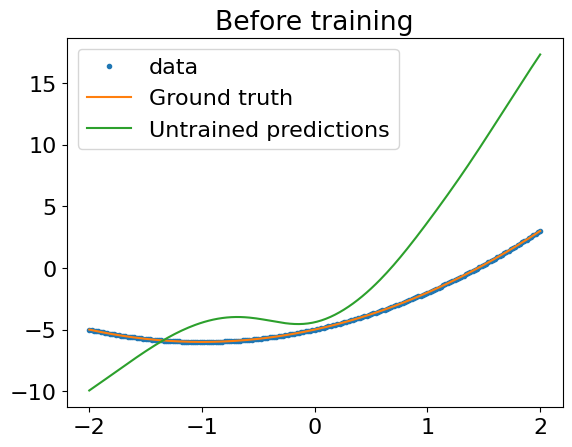

In [19]:
inputs = tf.keras.layers.Input(shape=(1,), name='my_input')
model = Model(inputs)
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x_, model(x_), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [20]:
z=model.net_du(tf.constant(x_))
print(z)

(<tf.Tensor: shape=(201, 1), dtype=float32, numpy=
array([[ 6.281317  ],
       [ 6.3106246 ],
       [ 6.3381386 ],
       [ 6.363658  ],
       [ 6.3869805 ],
       [ 6.40789   ],
       [ 6.4261837 ],
       [ 6.441643  ],
       [ 6.45405   ],
       [ 6.4631968 ],
       [ 6.4688616 ],
       [ 6.4708385 ],
       [ 6.4689245 ],
       [ 6.4629164 ],
       [ 6.4526296 ],
       [ 6.437871  ],
       [ 6.418477  ],
       [ 6.3942895 ],
       [ 6.3651648 ],
       [ 6.330971  ],
       [ 6.2916    ],
       [ 6.246953  ],
       [ 6.196965  ],
       [ 6.1415763 ],
       [ 6.0807533 ],
       [ 6.014491  ],
       [ 5.942794  ],
       [ 5.8656926 ],
       [ 5.7832394 ],
       [ 5.6954994 ],
       [ 5.602562  ],
       [ 5.504531  ],
       [ 5.4015255 ],
       [ 5.2936745 ],
       [ 5.181117  ],
       [ 5.064006  ],
       [ 4.9424915 ],
       [ 4.816733  ],
       [ 4.68688   ],
       [ 4.553096  ],
       [ 4.415528  ],
       [ 4.274325  ],
       [ 4.1296186 ],
   

In [22]:
model.train(x_,y_)

-->training_starting


ValueError: No gradients provided for any variable: (['model_4/dense_9/kernel:0', 'model_4/dense_9/bias:0', 'model_4/dense_10/kernel:0', 'model_4/dense_10/bias:0', 'model_4/dense_11/kernel:0', 'model_4/dense_11/bias:0'],). Provided `grads_and_vars` is ((None, <tf.Variable 'model_4/dense_9/kernel:0' shape=(1, 16) dtype=float32, numpy=
array([[-0.3276919 , -0.85237944,  0.70266294, -0.68778294,  0.24464472,
        -0.23463991,  1.2661091 ,  0.19991459,  0.08865825, -1.268785  ,
         1.0145193 , -0.08636857, -0.8575444 ,  0.4371346 ,  0.05710891,
         0.8841833 ]], dtype=float32)>), (None, <tf.Variable 'model_4/dense_9/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.35588992,  0.22007893,  0.77415144, -0.4288373 ,  0.78469986,
        1.7620404 , -0.49671078,  0.4928099 ,  1.3349717 , -0.9175457 ,
        1.3415012 , -0.72598463,  0.64452183,  2.190798  , -0.16511746,
       -2.077852  ], dtype=float32)>), (None, <tf.Variable 'model_4/dense_10/kernel:0' shape=(16, 16) dtype=float32, numpy=
array([[ 1.3069235 ,  2.156393  ,  0.571936  ,  0.19303854,  2.312816  ,
        -0.94929636,  0.5836711 , -0.5403519 ,  0.5308036 ,  1.2343602 ,
        -0.3517748 , -0.47468117,  0.14129648,  1.0412272 ,  1.7289027 ,
        -0.3591033 ],
       [ 0.4828336 ,  2.1002939 , -0.58953315,  0.354838  , -0.87679255,
         0.3589581 , -0.6049861 , -0.79493684,  0.9553983 ,  0.6292502 ,
        -0.12312786, -0.0562358 , -0.4892391 ,  0.94698536,  1.6046907 ,
        -1.6381673 ],
       [-0.5172486 ,  0.534086  , -1.1775494 , -1.0399266 ,  0.08569658,
        -0.52500385,  0.7644721 ,  0.34371278, -0.05070598, -1.2769916 ,
        -1.1361548 ,  0.39179376,  0.205294  ,  2.0293176 ,  0.9843761 ,
         0.7283719 ],
       [ 2.050168  , -2.079934  ,  1.7464564 , -1.2650139 , -0.35372904,
         0.1939096 ,  0.64890915, -0.78770876,  0.72627866, -0.6609428 ,
        -1.5794047 , -0.45735735, -1.7774477 , -0.58006746, -0.78348786,
         0.89906585],
       [-1.9003996 ,  0.37713528,  0.90485835, -0.08029899,  0.35115167,
         0.27332315, -0.86052513, -0.4736263 , -0.56867456, -1.7308643 ,
        -1.3020397 , -0.5832621 ,  0.4825558 , -0.08958083, -0.7748727 ,
         1.3530401 ],
       [ 1.4906056 ,  0.7137005 ,  0.12927575,  0.19107068, -0.65732026,
         0.5114096 , -1.0986812 ,  0.92761487,  0.11098373,  0.75598854,
        -0.6196345 , -1.5251801 , -0.53424853, -1.8035729 ,  0.4273693 ,
         0.63655305],
       [-0.5049297 ,  2.6042852 , -0.09143044,  0.26930478, -0.05310395,
         0.56179047,  1.3385738 , -0.5035606 ,  0.73644125, -0.805727  ,
         0.18613881, -0.34931734,  0.10237683, -0.36855447,  0.10738419,
         2.2531729 ],
       [ 0.2628108 ,  0.32978705, -1.6376671 , -3.2737138 , -0.5048424 ,
         1.8616259 ,  1.0118232 ,  0.60842544, -0.47693455,  1.6807917 ,
         0.42566797, -0.3568843 ,  0.04355636,  0.31061596,  0.13167188,
         1.291674  ],
       [-0.7933564 , -0.90196395,  0.90121704, -0.26220822,  1.0611153 ,
         1.5157634 , -0.16252805,  0.6080373 ,  0.83911115,  0.805229  ,
         0.22074702,  0.922835  , -0.26675022, -0.7639241 ,  0.13391365,
        -0.28779492],
       [ 1.6214726 , -1.6464072 , -0.53574663,  0.3815379 ,  0.36240742,
         1.0407813 ,  0.7293621 ,  1.7801292 ,  0.08303283,  0.2429007 ,
         1.5666269 ,  0.8331375 ,  0.15162551,  1.479998  ,  0.622335  ,
        -0.1792122 ],
       [-0.12089426, -1.292296  ,  0.7259739 , -0.8114447 , -1.04147   ,
        -0.2972359 , -0.17486675, -1.0548815 ,  0.13005915, -0.7249102 ,
        -0.99349   ,  2.4139764 ,  0.4546658 ,  0.83481646, -0.67323875,
        -0.38127992],
       [-0.2202124 ,  2.839981  , -0.879832  , -0.540522  ,  0.1013533 ,
         0.5799119 ,  2.002277  , -0.9317363 , -0.17189533,  0.6484813 ,
         1.1603355 ,  0.03198772,  0.543263  ,  0.55963224, -2.169079  ,
         0.42722747],
       [ 0.5219354 ,  0.47822052,  0.45434326, -0.67292637, -0.987809  ,
         0.98950493, -0.1567295 , -0.6889078 , -0.9794126 , -0.06868861,
         0.6761001 ,  0.39198864, -0.68310577, -0.97220784,  0.55448496,
         0.61231977],
       [ 1.9104365 ,  0.5801684 , -0.04055465, -0.04841471, -1.7214655 ,
         1.1620748 ,  1.1821457 , -1.1313345 , -0.56827444,  0.7964518 ,
         0.59092706, -0.511534  ,  0.19793622, -1.1219084 ,  1.3873951 ,
        -1.2499917 ],
       [-0.3440053 , -0.08561233, -1.2610341 ,  2.105117  , -1.078741  ,
        -0.61047703,  0.7580545 ,  2.0406225 ,  1.8602296 ,  0.5585874 ,
         0.86582965,  1.4542253 , -1.1726471 , -1.1611449 , -1.6227319 ,
         0.8103154 ],
       [-0.46154112,  0.22672985,  0.6126402 ,  0.80005646, -1.0370233 ,
        -0.5793421 ,  0.8134021 , -0.6131664 ,  0.6399323 , -1.6477635 ,
         0.18945032, -0.38094324, -0.80238545, -0.24574503, -1.1197228 ,
         0.00425862]], dtype=float32)>), (None, <tf.Variable 'model_4/dense_10/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.9653921 , -1.1847095 , -0.6211926 , -0.97533625,  0.04761235,
        0.27345306, -0.0961241 ,  1.420771  ,  0.96931696,  1.6556519 ,
        1.5964416 , -0.22780667, -0.24559347, -0.633969  , -1.9661607 ,
        1.1160764 ], dtype=float32)>), (None, <tf.Variable 'model_4/dense_11/kernel:0' shape=(16, 1) dtype=float32, numpy=
array([[-1.0963478 ],
       [ 0.9883374 ],
       [-0.69796085],
       [ 0.92368263],
       [-0.47739288],
       [-0.17016478],
       [-0.0068043 ],
       [-2.2071452 ],
       [ 1.2030164 ],
       [-0.16731219],
       [-1.0145575 ],
       [ 0.15970644],
       [ 1.9673966 ],
       [-0.1322131 ],
       [ 1.3515571 ],
       [ 1.987708  ]], dtype=float32)>), (None, <tf.Variable 'model_4/dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)).

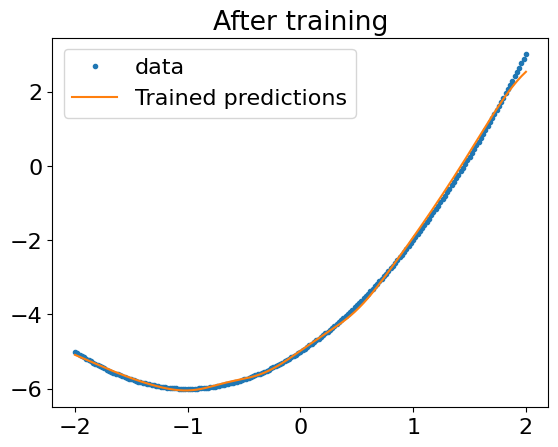

In [7]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend();

In [8]:
model.net_du(tf.constant([5.0]))

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([-2.354057], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([-0.00215562], dtype=float32)>)

In [9]:
def df(x):
  y = 2*x + 2
  return y

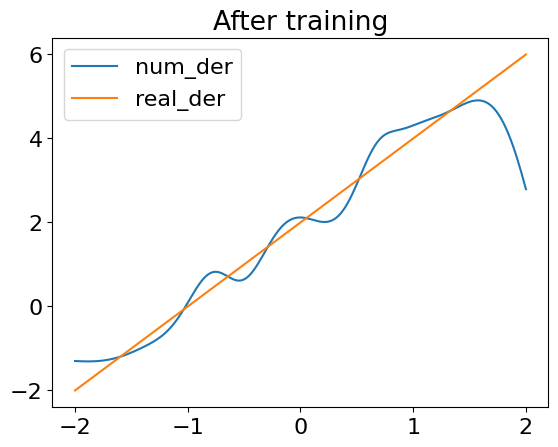

In [10]:
plt.plot(x, model.net_du(x)[0],  label='num_der')
plt.plot(x, df(x), label='real_der')
plt.title('After training')
plt.legend();

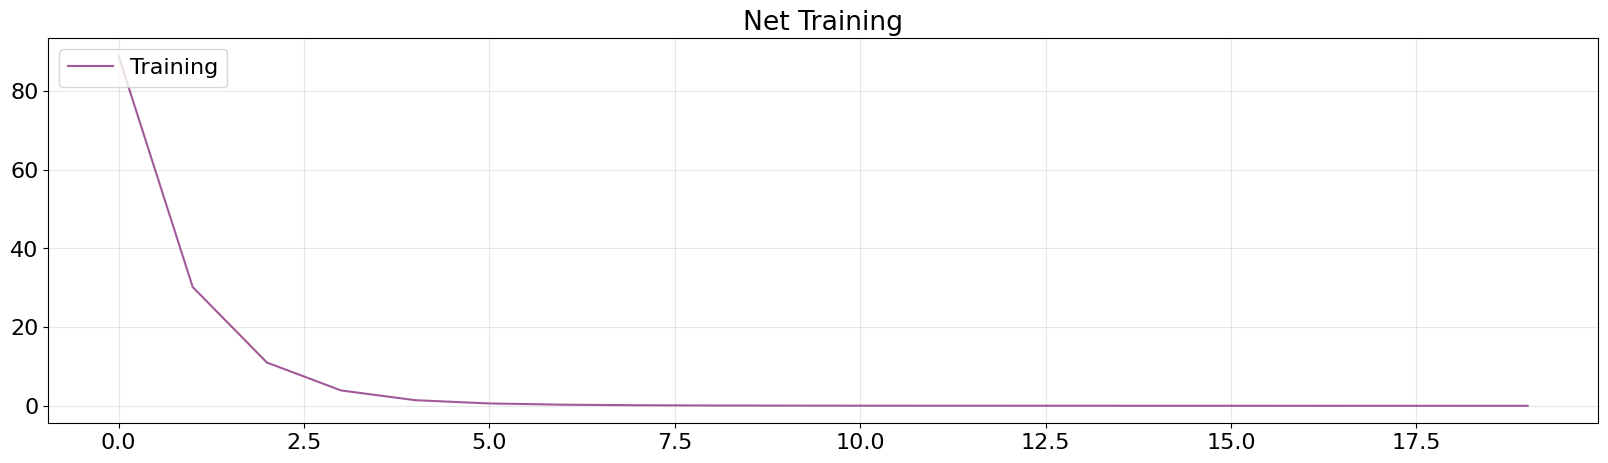

In [11]:
plt.figure(figsize=(20,5))
plt.plot(model.history, label='Training', alpha=.8, color='#8A307F', markersize=20)
plt.legend(loc='upper left')
plt.title('Net Training')
plt.grid(alpha=.3)